# Lab03 - Clustering

## Yêu cầu bài tập

**Cách làm bài**


- Bạn sẽ làm trực tiếp trên file notebook này; trong file, từ `TODO` để cho biết những phần mà bạn cần phải làm. **Không được sửa những chỗ không có** `TODO`.

- Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

- Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

- Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`) và ấn Ctrl+S để lưu lại.

**Nội dung bài tập**

Trong bài này, bạn sẽ cài đặt 2 thuật toán `k-means` và `k-medois` để gom nhóm dữ liệu. 

## Import thư viện 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Cài đặt thuật toán K-mean

Tính khoảng cách euclid giữa 2 điểm dữ liệu x, y

In [2]:
def euclidianDistance(x, y):
    '''
    Euclidian distance between x, y
    --------
    Return
    d: float
    '''
    #TODO
    return np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

In [3]:
class k_means:
    def __init__(self, k=2, thresold = 0.001, max_iter = 300, has_converged=False):
      
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''

 
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
        
    def initCentroids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1, self.k)
        self.centroids=X[indexes]
            
        
    def updateCentroids(self, cur_centroids):
        '''
        Class constructor
        
        Parameters
        ----------
        cur_centroids: list of new centroids
        
        '''
        self.has_converged=True
        
        for c in range(0,self.k):
            prev_centroid = self.centroids[c]
            cur_centroid  = cur_centroids[c]
            #checking if % of difference between old position and new position is more than thresold
            
            #TODO d=?
            d = euclidianDistance(prev_centroid, cur_centroid)
            
            
            if  d > self.thresold:
                self.has_converged = False
                self.centroids = cur_centroids
            
    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)
            
        #Main loop
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            
            for centroid in range(0,self.k):
                #List samples of current cluster
                samples = []
                
                for k in range(len(X)):
                    d_list = []
                    for j in range(self.k):
                        d_list.append(euclidianDistance(self.centroids[j], X[k]))
                    
                    # Cluster has minimal distance between its centroid and data sample
                    # TODO (c=???)
                    c = d_list.index(min(d_list))

                    #Store sample to list
                    if c == centroid:
                        samples.append(X[k])   
                
                #New centroids of each cluster is calculated by mean of all samples closest to it
                
                #TODO (new_centroid=???)
                sum_x = sum_y = 0
                for item in samples:
                    sum_x += item[0]
                    sum_y += item[1]
                new_centroid = (sum_x/len(samples), sum_y/len(samples))
            
                cur_centroids.append(new_centroid)
                
            self.updateCentroids(cur_centroids)
            
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)

    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(self.centroids[j], data[i]))
                
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            #TODO 
            pred.append(d_list.index(min(d_list)))
            
        return np.array(pred)

## Chạy thuật toán 

**Khởi tạo dữ liệu**

Ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu.

In [4]:
np.random.seed(8) # This will fix the randomization; so, you and me will have the same results

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

**Hiển thị dữ liệu trên đồ thị**

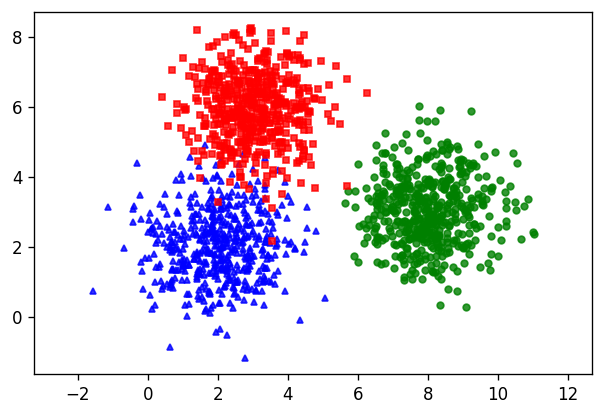

In [5]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
visualize(X, original_label)

**Gom nhóm dữ liệu bằng thuật toán k-means mà bạn vừa cài đặt**

Centers found by your model:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


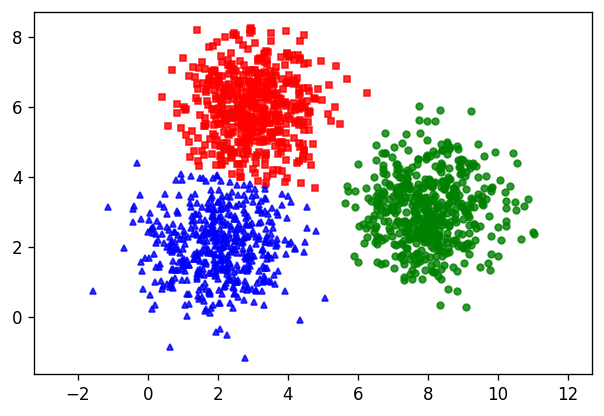

In [6]:
model1=k_means(k=3)
print('Centers found by your model:')
print(model1.fit(X))

pred=model1.predict(X)

visualize(X,pred)


**Thử lại kết quả với scikit learn**

Centers found by scikit-learn:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


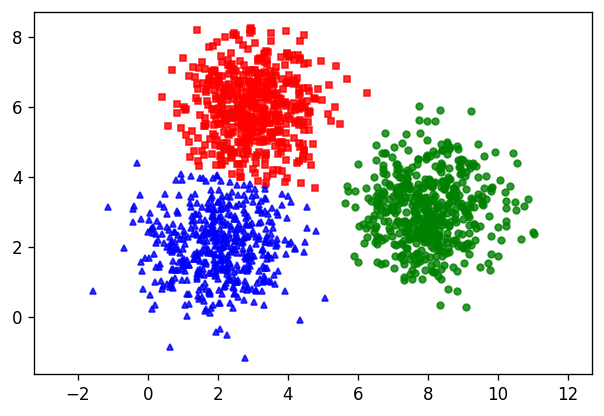

In [7]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

## 2. Cài đặt thuật toán K-medoids

Các bạn cài đặt và thử nghiệm thuật toán K-medois tương tự như phần 1

In [17]:
class kMedoids:
    """
    clustering using k-medoids
    """

    def __init__(self, k=2, max_iter=300, threshold=0.001):
        self.k = k
        self.max_iter = max_iter
        self.threshold = threshold
        self.cost = 0
        self.stop = False

    def initCentroids(self, data):
        self.centroids = []
        indexes = np.random.randint(0, len(data)-1, self.k)
        self.centroids = data[indexes]

    def cluster(self, centroids, data):
        """
        assign each data point to the cluster with the nearest centroid
        return cost of this centroids and a list that contains all the clusters
        """
        cost = 0
        afterCluster = [[]] * self.k

        for i in range(len(data)):
            d_list = []
            for j in range(self.k):
                d_list.append(euclidianDistance(centroids[j], data[i]))

            minCost = min(d_list)
            afterCluster[d_list.index(minCost)].append(data[i])
            cost += minCost

        return cost, afterCluster

    def checkCentroids(self, c1, c2):
        """
        checkCentroids function: to check if |old_centroid - new_centroid| < threshold to stop the algorithm
        """
        self.stop = True
        for c in range(self.k):
            d = euclidianDistance(c1[c], c2[c])
            if d > self.threshold:
                self.stop = False
                break

    def fit(self, data):
        """
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        """

        # random a set of new centroids
        self.initCentroids(data)

        # count number of loop 
        count = 0
        while True:
            # calculate the cost and get the clusters after clustering 
            old_cost, afterCluster = self.cluster(self.centroids, data)
            for c in range(self.k):
                # pick a random point
                p = np.random.randint(0, len(afterCluster[c]) - 1)
                while afterCluster[c][p] in self.centroids:
                    p = np.random.randint(0, len(afterCluster[c]) - 1)

                # increase count by 1 unit after each swap
                count += 1
                if self.stop or count > self.max_iter:
                    return np.array(self.centroids)
                
                # swap a centroid with this point and recalculate the cost
                tempCentroids = self.centroids.copy()
                tempCentroids[c] = afterCluster[c][p]
                new_cost, _ = self.cluster(tempCentroids, data)

                # check check các kiểu 
                if new_cost < old_cost:
                    old_cost = new_cost
                    self.checkCentroids(self.centroids, tempCentroids)
                    self.centroids = tempCentroids

    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.

        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''

        pred = []
        for i in range(len(data)):
            d_list = []
            for j in range(len(self.centroids)):
                d_list.append(euclidianDistance(self.centroids[j], data[i]))

            pred.append(d_list.index(min(d_list)))

        return np.array(pred)

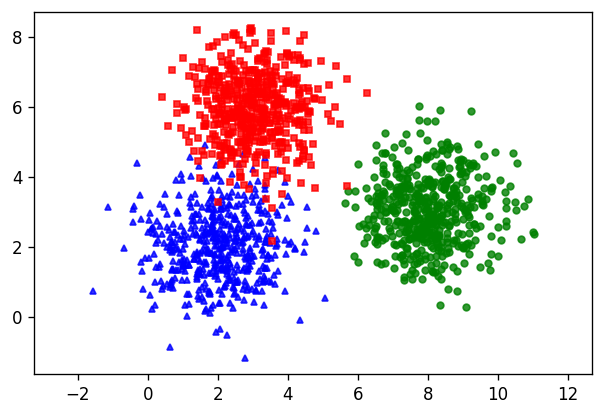



Centers found by your model:
[[2.26972175 2.19155527]
 [8.20567028 2.93604816]
 [2.95356965 5.71113147]]


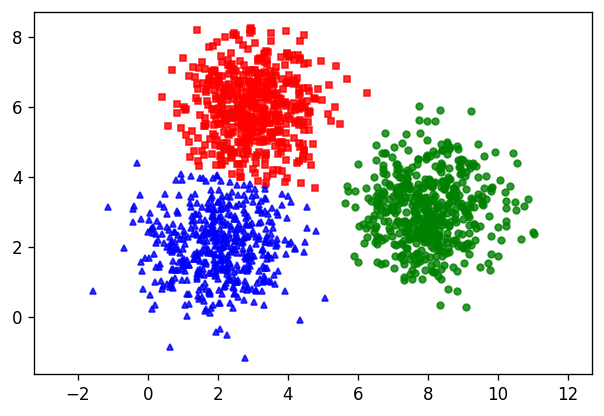



Centers found by scikit-learn:
[[1.98413249 2.04159709]
 [7.93224207 3.0213355 ]
 [2.98493437 5.97312308]]


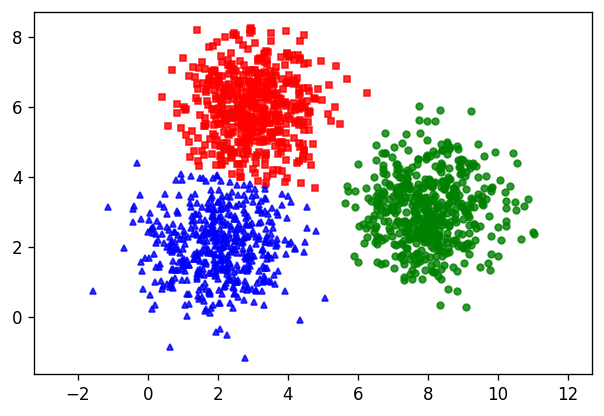

In [19]:
# copy code của thầy
# random lại 1 bộ dữ liệu để test

np.random.seed(8)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

# hiển thị dữ liệu random được 
visualize(X, original_label)

# chạy thử bằng code vừa cài đặt 
model1=kMedoids(k=3)
print('\n\nCenters found by your model:')
print(model1.fit(X))
pred=model1.predict(X)
visualize(X,pred)

# chạy thử bằng sklearn 
# phải cài đặt thư viện sklearn_extr
from sklearn_extra.cluster import KMedoids
model2 = KMedoids(n_clusters=3, random_state=0).fit(X)
print('\n\nCenters found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

**Nêu điểm khác biệt giữa thuật toán K-means và K-medoids:**

TODO: 
- Sự khác nhau cơ bản và dễ nhận ra nhất: tâm cụm của K-means được tính toán từ giá trị trung bình. Trong khi đó, tâm cụm của K-medoids là một giá trị cụ thể có trong tập dữ liệu 
- Cụ thể, ta có bảng so sánh giữa 2 thuật toán như sau. (Ký hiệu i là số lần lặp, k là số cụm, n là số mẫu dữ liệu)

|           Yếu tố          |        K-Means       |    K-Medoids   |
|:-------------------------:|:--------------------:|:--------------:|
| Độ phức tạp               | $O(i \times k \times n)$               | $O(i\times k \times(n-k)^2)$ |
| Tính thực thi             | Dễ dàng cài đặt      | Khó cài đặt    |
| Cụm có hình dạng lồi      | Cụm luôn có dạng lồi | Không rõ       |
| Yêu cầu biết trước số cụm | Có                   | Có             |

# 3. Sử dụng thuật toán gom cụm trên tập dữ liệu Iris 

In [20]:
from sklearn import datasets
iris = datasets.load_iris()

In [21]:
X = iris.data
y = iris.target

Text(0, 0.5, 'Pepal Width')

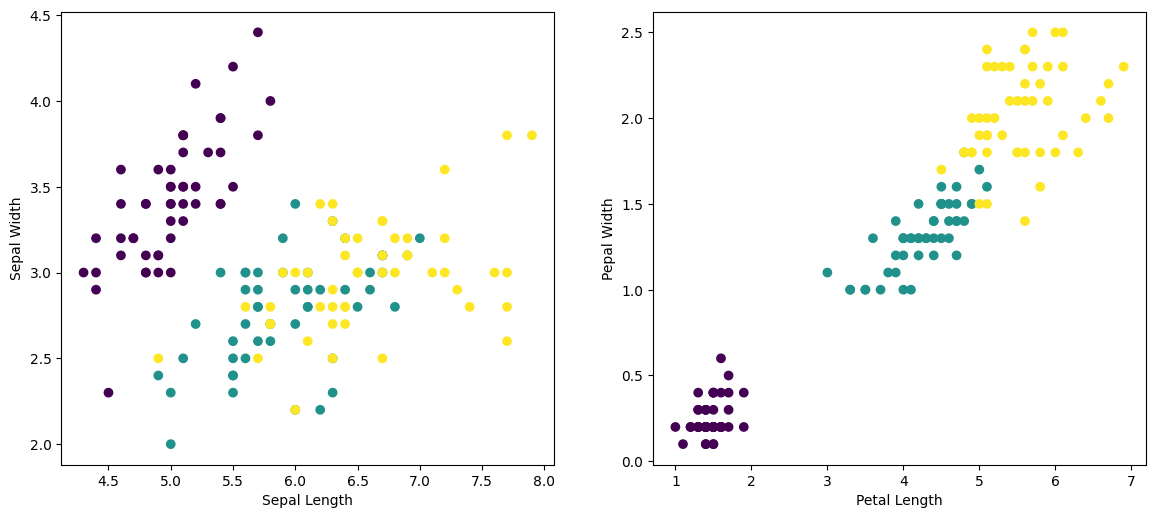

In [22]:
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(X[:,2], X[:,3], c=y)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Pepal Width')

**Nhận xét:**

TODO:

In [23]:
D=X[:,2:]
model=k_means(k=3)
centers = model.fit(D)
print(centers)

[[5.62608696 2.04782609]
 [4.29259259 1.35925926]
 [1.462      0.246     ]]


Text(0.5, 1.0, 'Predicted')

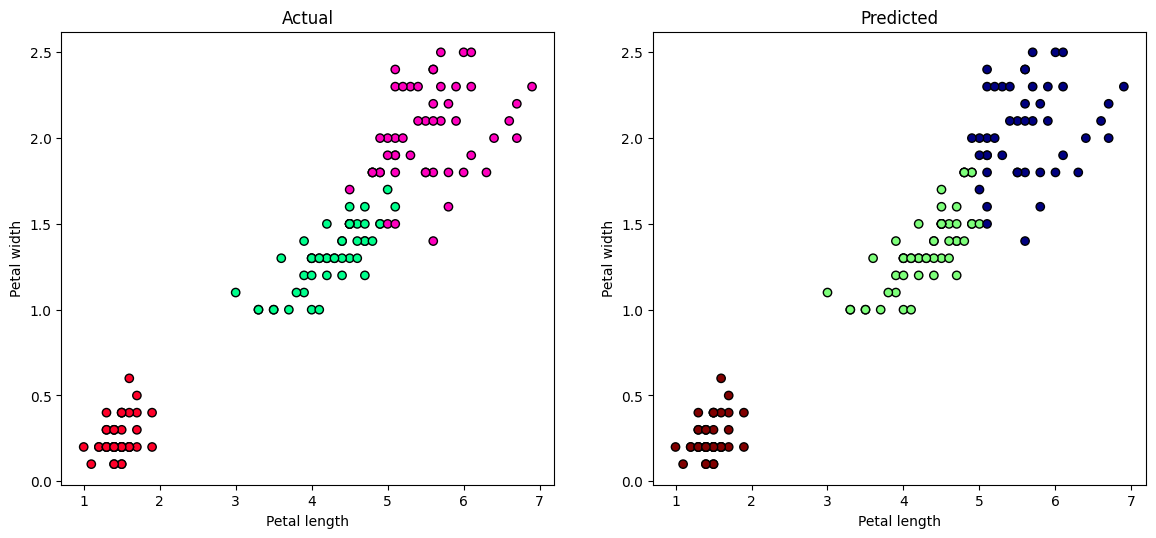

In [24]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

**Nhận xét kết quả:**

TODO:



### Thực hiện tương tự với thuật toán K-medois

In [25]:
#TODO
D=X[:,2:]
model=kMedoids(k=3)
centers = model.fit(D)
print(centers)

[[1.4 0.2]
 [5.7 2.1]
 [4.4 1.4]]


Text(0.5, 1.0, 'Predicted')

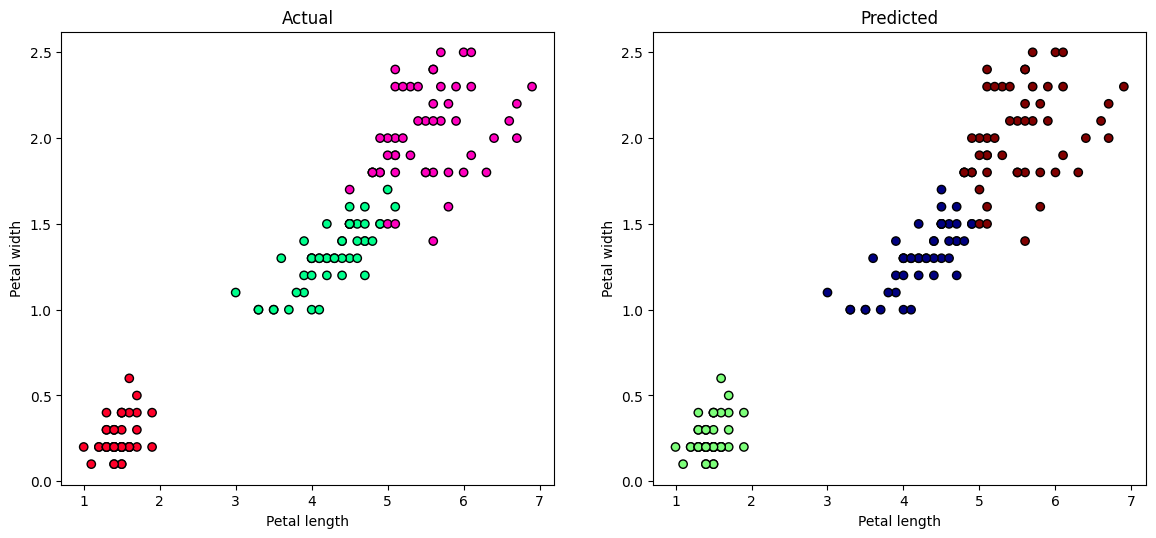

In [16]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow', edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet', edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')